<a href="https://colab.research.google.com/github/Abhiram-k1/CLINICAL-DATA-ANALYSIS-AND-VISUALISATION/blob/main/clinical_data_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

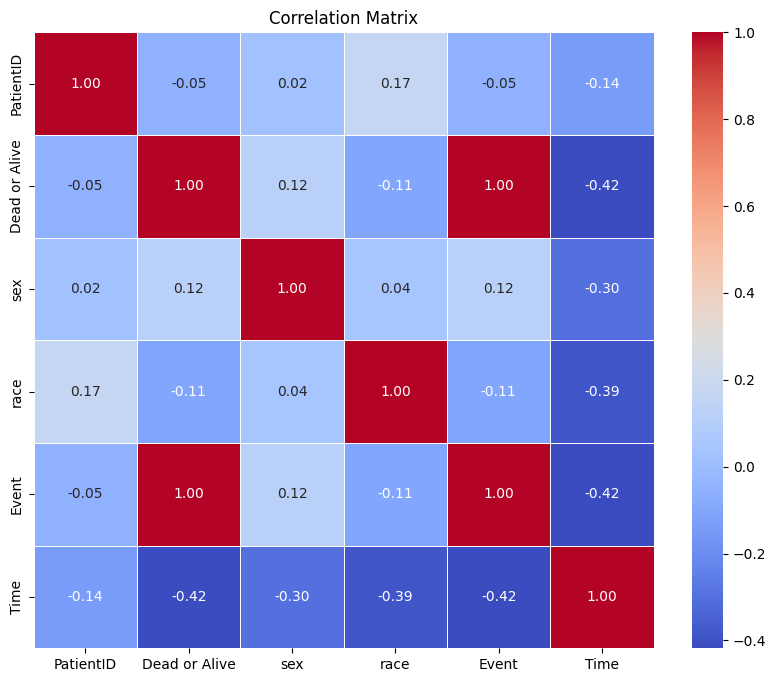

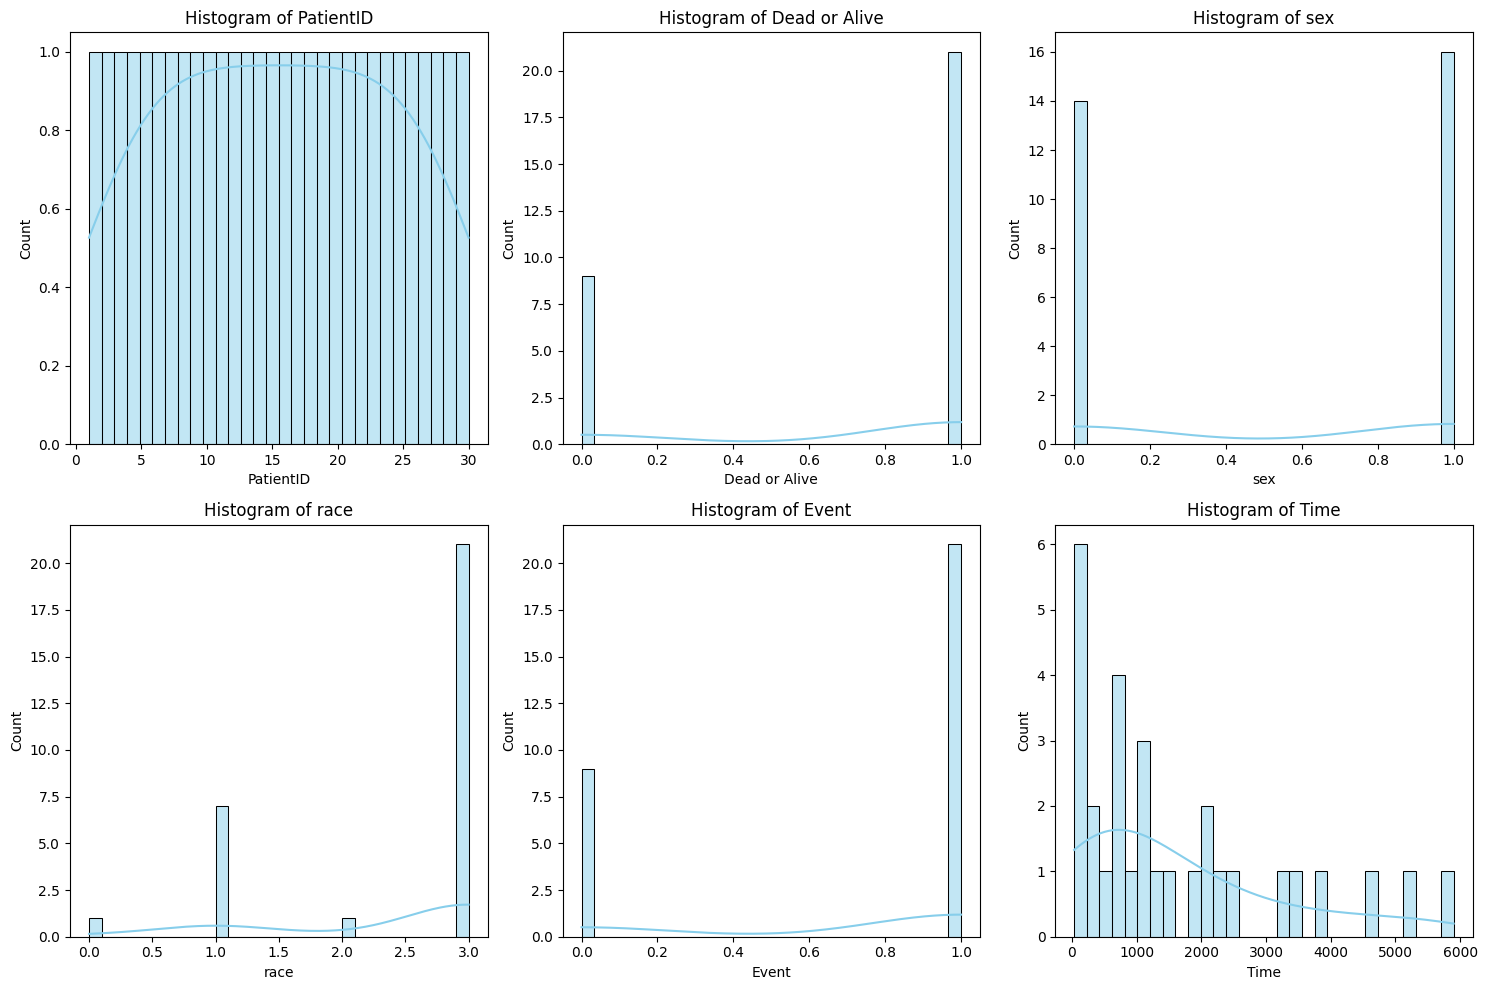

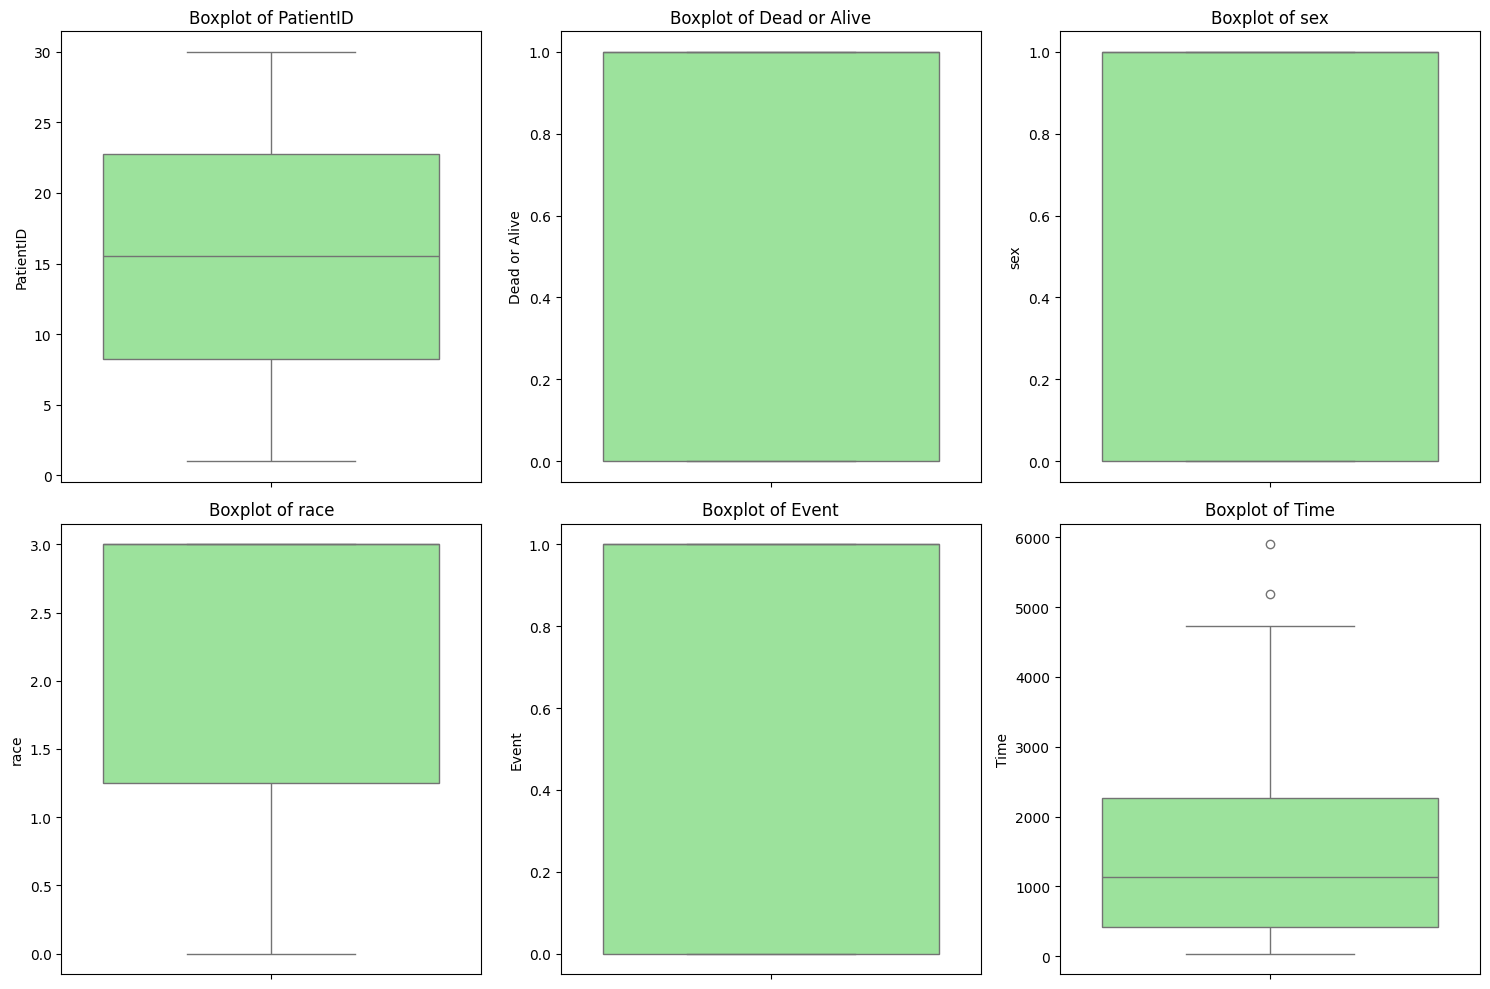

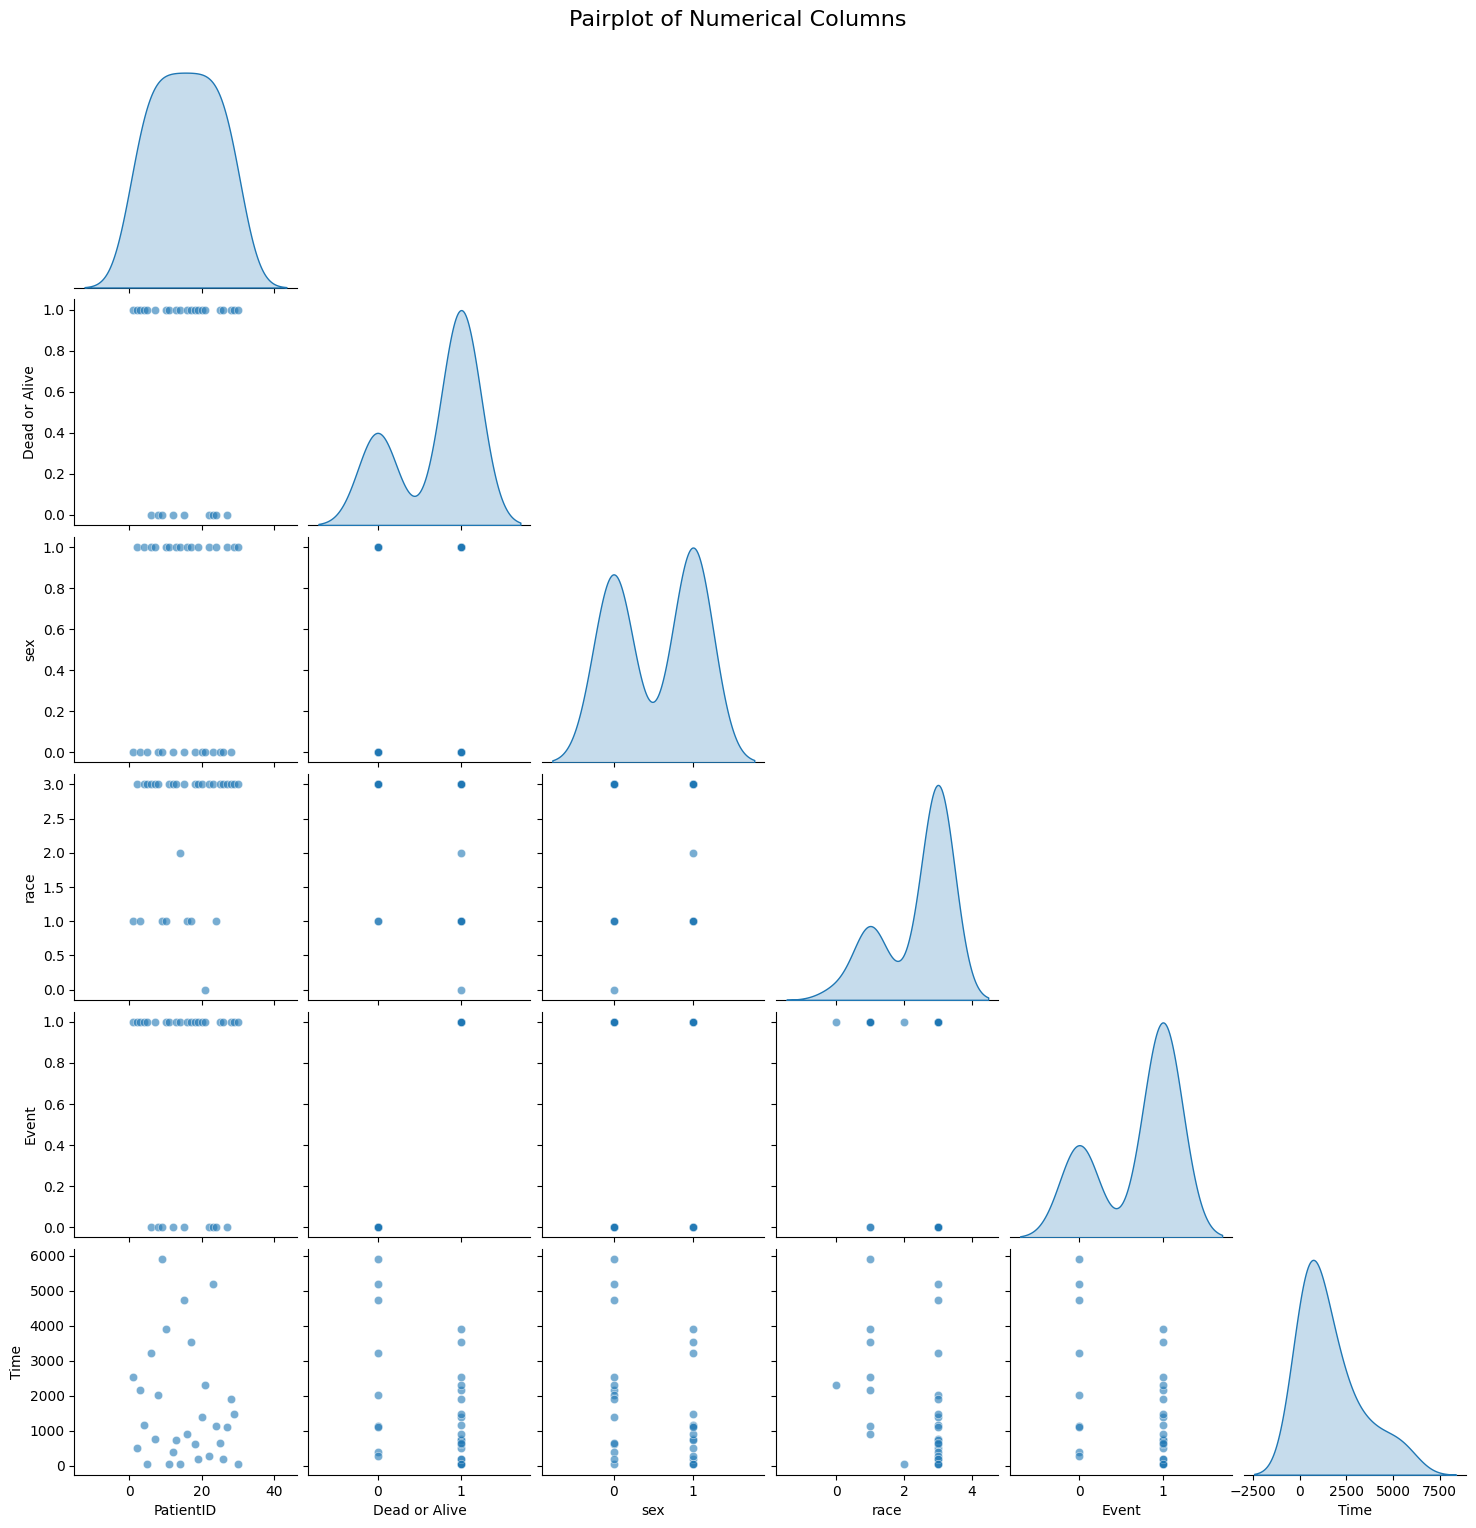

No categorical columns available for countplot visualizations.


/tmp/ipython-input-3-1671259150.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_gender_comparison = df.groupby(['sex', 'Stage']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

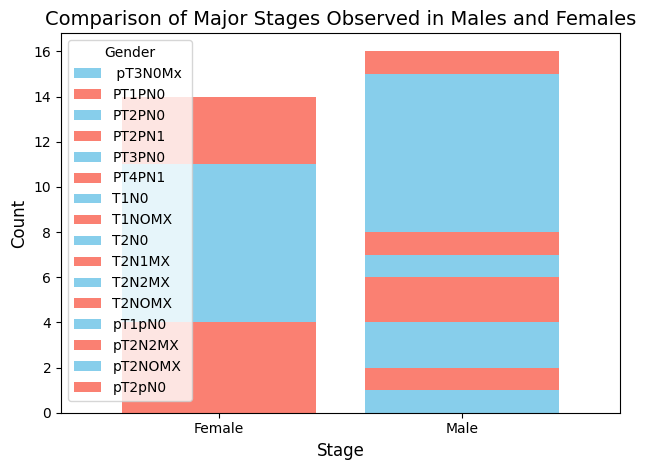

Stage comparison data:
Stage    pT3N0Mx   PT1PN0  PT2PN0  PT2PN1  PT3PN0  PT4PN1  T1N0  T1NOMX  T2N0  \
sex                                                                             
Female          0       4       1       0       1       0     2       0     3   
Male            1       1       2       1       0       1     1       1     4   

Stage   T2N1MX  T2N2MX  T2NOMX  pT1pN0  pT2N2MX  pT2NOMX  pT2pN0  
sex                                                               
Female       1       0       1       0        1        0       0  
Male         0       1       0       1        0        1       1  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clinical dataset
file_path = '/content/Clinical Data_Discovery_Cohort.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Handle missing values usng median imputation
for column in df.select_dtypes(include=[np.number]).columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna('Unknown', inplace=True)

# Remove duplicate rows
df = df.drop_duplicates()

# Convert columns to appropriate data types
df['Specimen date'] = pd.to_datetime(df['Specimen date'], errors='coerce')
df['Date of Death'] = pd.to_datetime(df['Date of Death'], errors='coerce')
df['Date of Last Follow Up'] = pd.to_datetime(df['Date of Last Follow Up'], errors='coerce')

# Encode categorical columns into numeric values for correlation
df['Dead or Alive'] = df['Dead or Alive'].map({'Alive': 0, 'Dead': 1})
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['race'] = df['race'].astype('category').cat.codes

# Convert Stage to a categorical variable (keep original labels for plotting)
df['Stage'] = df['Stage'].astype('category')


# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

# Correlation matrix heatmap
if not numeric_columns.empty:
    correlation_matrix = numeric_columns.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")

# Plot histograms for numerical columns
if not numeric_columns.empty:
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot((len(numeric_columns.columns) + 2) // 3, 3, i + 1)
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for histogram plots.")

# Plot boxplots for numerical columns
if not numeric_columns.empty:
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot((len(numeric_columns.columns) + 2) // 3, 3, i + 1)
        sns.boxplot(y=df[column], color='lightgreen')
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for boxplot visualization.")

# Pairplot for numerical columns
if len(numeric_columns.columns) > 1:
    sns.pairplot(df[numeric_columns.columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot of Numerical Columns', y=1.02, fontsize=16)
    plt.show()
else:
    print("Not enough numerical columns for pairplot.")

# Countplot for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(categorical_columns):
        plt.subplot((len(categorical_columns) + 2) // 3, 3, i + 1)
        sns.countplot(y=df[column], palette='viridis', order=df[column].value_counts().index)
        plt.title(f'Countplot of {column}')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns available for countplot visualizations.")

# Comparison of major stage observed in males and females (categorical)
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})  # Convert back to labels if needed
stage_gender_comparison = df.groupby(['sex', 'Stage']).size().unstack(fill_value=0)

# Plot the comparison
plt.figure(figsize=(10, 6))
stage_gender_comparison.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], width=0.8)
plt.title('Comparison of Major Stages Observed in Males and Females', fontsize=14)
plt.xlabel('Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display stage comparison table
print("Stage comparison data:")
print(stage_gender_comparison)
